In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

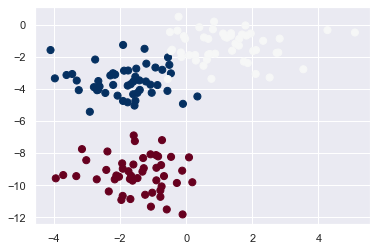

In [15]:
from sklearn.datasets import make_blobs
X, y = make_blobs(150, 2, centers=3, random_state=2, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [3]:
np.unique(y)

array([0, 1, 2])

In [4]:
X_1 = X[y==1]
X_0 = X[y==0]
X_2 = X[y==2]

prior_proba_1= len(X_1)/len(X)
prior_proba_0= len(X_0)/len(X)
prior_proba_2= len(X_2)/len(X)

In [5]:
def mean_and_std(X: np.ndarray) -> list:
    output = []
    for feature in zip(*X):
        a = np.array([np.mean(feature), np.std(feature)])
        output.append(a)
    return np.array(output)

In [6]:
gaussian_params_1 = mean_and_std(X_1) #              mean std
                                      # first feature
                                      # second feature
gaussian_params_0 = mean_and_std(X_0)
gaussian_params_2 = mean_and_std(X_2)

In [7]:
def gaussian_distr(X: np.ndarray, mean: np.ndarray, std: np.ndarray) -> np.ndarray:
        exponent = np.exp(-((X-mean)**2 / (2*std**2)))
        return exponent / (np.sqrt(2*np.pi)*std)

In [8]:
def calculate_joint_likelihood(proba: np.ndarray, prior_proba: float) -> np.ndarray:
    joint_likelihood = []
    
    for row in proba:
        likelihood = 1
        for el in row:
            likelihood *= el
        likelihood *= prior_proba
        joint_likelihood.append(likelihood)
        
    return np.array(joint_likelihood)

In [9]:
def predict(X: np.ndarray, alpha: int = 1) -> np.ndarray:
    proba_0 = gaussian_distr(X, gaussian_params_0[:, 0], gaussian_params_0[:, 1])
    proba_1 = gaussian_distr(X, gaussian_params_1[:, 0], gaussian_params_1[:, 1])
    proba_2 = gaussian_distr(X, gaussian_params_2[:, 0], gaussian_params_2[:, 1])

    jl_0 = calculate_joint_likelihood(proba_0, prior_proba_0)
    jl_1 = calculate_joint_likelihood(proba_1, prior_proba_1)
    jl_2 = calculate_joint_likelihood(proba_2, prior_proba_2)

    pred = np.array([jl_0, jl_1, jl_2]).T
    
    return pred.argmax(axis=1)


In [10]:
predicted = predict(X)

In [11]:
(predicted == y).mean()

0.98

In [12]:
rng = np.random.RandomState(8)
Xnew = [-6, -14] + [14, 18] * rng.rand(2500, 2)
ynew = predict(Xnew)

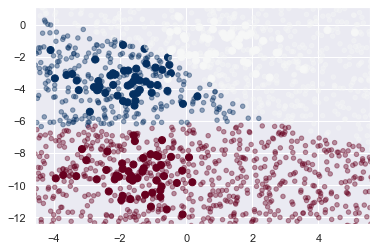

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.4)
plt.axis(lim);